In [1]:
import numpy as np
import pandas as pd

In [2]:
files = [
    'no_treatment',
    'standard_ivt_only',
    'msu_ivt_only',
    'standard_ivt_mt',
    'msu_ivt_mt']

data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'./{file}.csv')
    df['scenario'] = file
    data = pd.concat([data, df], axis=0)

In [3]:
hospitals_in_region = set(data['closest_ivt_unit'])

In [4]:
cols = ['scenario', 'mRS shift', 'utility_shift', 'mRS 0-2', 'time_needle', 'time_puncture']
results = data[cols].groupby('scenario').mean()
results.loc[files].round(2)

,mRS shift,utility_shift,mRS 0-2,time_needle,time_puncture
scenario,,,,,
no_treatment,0.00,0.00,0.48,NaN,NaN
standard_ivt_only,-0.39,0.07,0.56,173.74,NaN
msu_ivt_only,-0.44,0.08,0.57,147.81,NaN
standard_ivt_mt,-0.46,0.09,0.57,173.63,305.73
msu_ivt_mt,-0.58,0.11,0.60,147.66,220.15


In [5]:
data.to_csv('all_results.csv')

In [6]:
df = pd.DataFrame()
cols = ['lsoa', 'utility_shift']
mask = data['scenario'] == 'standard_ivt_mt'
df['standard ivt'] = data[mask][cols].groupby('lsoa').mean()
mask = data['scenario'] == 'msu_ivt_mt'
df['msu ivt'] = data[mask][cols].groupby('lsoa').mean()
df['msu_benefit'] = df['msu ivt'] - df['standard ivt']
df

,standard ivt,msu ivt,msu_benefit
lsoa,,,
Cornwall 001A,0.063451,0.104711,0.041261
Cornwall 001B,0.065695,0.105340,0.039645
Cornwall 001C,0.063413,0.105707,0.042294
Cornwall 001D,0.064313,0.104626,0.040313
Cornwall 001E,0.063534,0.107984,0.044450
...,...,...,...
West Devon 007C,0.126074,0.143193,0.017119
West Devon 007D,0.118807,0.137873,0.019066
West Somerset 002D,0.063079,0.082915,0.019836


In [7]:
import geopandas
import matplotlib.pyplot as plt

In [8]:
filename = "zip://./../data/Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:27700')
lsoa_gdf.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [9]:
lsoa_data_gdf = lsoa_gdf.merge(df, left_on='LSOA11NM', right_on='lsoa', how='right')
lsoa_data_gdf.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry,standard ivt,msu ivt,msu_benefit
0,E01018936,Cornwall 001A,Cornwall 001A,"POLYGON ((220565.173 107136.000, 220779.536 10...",0.063451,0.104711,0.041261
1,E01018937,Cornwall 001B,Cornwall 001B,"POLYGON ((221546.782 106735.219, 221608.000 10...",0.065695,0.105340,0.039645
2,E01018938,Cornwall 001C,Cornwall 001C,"POLYGON ((221169.843 106247.892, 221189.393 10...",0.063413,0.105707,0.042294
3,E01018959,Cornwall 001D,Cornwall 001D,"POLYGON ((222488.203 109122.602, 222510.202 10...",0.064313,0.104626,0.040313
4,E01018960,Cornwall 001E,Cornwall 001E,"POLYGON ((222939.256 107628.386, 223060.360 10...",0.063534,0.107984,0.044450


In [10]:
hospitals_gdf = geopandas.read_file('./../data/stroke_hospitals_2022.csv')
hospitals_gdf.geometry = geopandas.points_from_xy(
        hospitals_gdf.long, hospitals_gdf.lat)
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
hospitals_gdf = hospitals_gdf.to_crs(epsg=27700)
hospitals_gdf.head()

,Postcode,Hospital_name,Use_IVT,Use_MT,Use_MSU,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,...,ivt_rate,Easting,Northing,long,lat,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
0,RM70AG,RM70AG,1,1,1,England,London SCN,Barking,Havering and Redbridge University Hospitals N...,Queens Hospital Romford HASU,...,11.9,551118,187780,0.179030640661934,51.5686465521504,1,0,Romford,,POINT (551118.001 187780.000)
1,E11BB,E11BB,1,1,1,England,London SCN,Barts Health NHS Trust,The Royal London Hospital,Royal London Hospital HASU,...,13.4,534829,181798,-0.0581329916047372,51.5190178361295,1,1,Royal London,,POINT (534829.001 181798.000)
2,SW66SX,SW66SX,1,1,1,England,London SCN,Imperial College Healthcare NHS Trust,"Charing Cross Hospital, London",Charing Cross Hospital HASU,...,9.9,524226,176487,-0.212736111308184,51.4737165811988,1,1,Charing Cross,,POINT (524226.001 176487.000)
3,SE59RW,SE59RW,1,1,1,England,London SCN,King's College Hospital NHS Foundation Trust,"King's College Hospital, London",King's College Hospital HASU,...,15,532536,176228,-0.0932514945350423,51.4695052907757,1,0,Kings College,,POINT (532536.001 176228.000)
4,BR68ND,BR68ND,1,0,0,England,London SCN,King's College Hospital NHS Foundation Trust,Princess Royal University Hospital,Princess Royal University Hospital HASU,...,13.3,543443,165032,0.0591464390000555,51.3662434074157,0,0,Princess Royal,,POINT (543443.001 165032.000)


In [11]:
# Limit hospitals_gdf Postcode to those in map_hopsitals
hospitals_gdf = hospitals_gdf[hospitals_gdf['Postcode'].isin(hospitals_in_region)]
hospitals_gdf.head()

,Postcode,Hospital_name,Use_IVT,Use_MT,Use_MSU,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,...,ivt_rate,Easting,Northing,long,lat,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
105,EX314JB,EX314JB,1,0,0,England,South West SCN,Northern Devon Healthcare NHS Trust,"North Devon District Hospital, Barnstaple",North Devon District Hospital,...,11.1,256506,134540,-4.05043137675056,51.092168764225,0,0,Barnstaple,,POINT (256506.001 134539.999)
106,PL68DH,PL68DH,1,1,1,England,South West SCN,Plymouth Hospitals NHS Trust,"Derriford Hospital, Plymouth",Derriford Hospital,...,10.2,249930,59564,-4.11368447542683,50.4167199488232,1,1,Plymouth,,POINT (249930.001 59563.999)
107,TR13LQ,TR13LQ,1,0,0,England,South West SCN,Royal Cornwall Hospitals NHS Trust,"Royal Cornwall Hospital, Truro",Royal Cornwall Hospital,...,6.5,179581,45313,-5.09426260732006,50.2665574865421,0,0,Truro,,POINT (179581.001 45312.999)
108,EX25DW,EX25DW,1,0,0,England,South West SCN,Royal Devon and Exeter NHS Foundation Trust,Royal Devon and Exeter Hospital,Royal Devon and Exeter Hospital,...,11.1,293730,91869,-3.50667977701006,50.7167028363024,0,1,Exeter,,POINT (293730.001 91868.999)
112,TQ27AA,TQ27AA,1,0,0,England,South West SCN,Torbay and South Devon NHS Foundation Trust,Torbay Hospital,Torbay Hospital,...,7.7,289857,65876,-3.55380386180876,50.4823161140488,0,0,Torbay,,POINT (289857.001 65875.999)


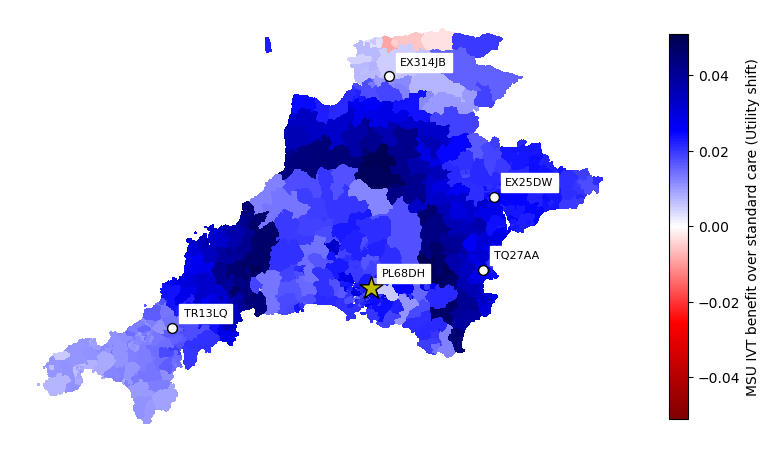

In [12]:
range = max(np.abs(np.max(lsoa_data_gdf['msu_benefit'])),
            np.abs(np.min(lsoa_data_gdf['msu_benefit'])))

fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
lsoa_data_gdf.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='msu_benefit', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmin=-range, # Manual scale min (remove to make automatic)
                 vmax=range, # Manual scale max (remove to make automatic)
                 cmap='sesimic_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':'MSU IVT benefit over standard care (Utility shift)'},
                 # Set to display legend
                 legend=True)


hospitals_gdf.plot(ax=ax, edgecolor='k', facecolor='w', markersize=50, 
                  marker='o')

# Add MT/MSU units
mask = hospitals_gdf['Use_MT'] == '1'
MSU = hospitals_gdf[mask]
MSU.plot(ax=ax, edgecolor='k', facecolor='y', markersize=300, 
                  marker='*')


# Add labels
for x, y, label in zip(
    hospitals_gdf.geometry.x, hospitals_gdf.geometry.y, hospitals_gdf.Hospital_name):
        ax.annotate(label, xy=(x, y), xytext=(8, 8), textcoords="offset points",
                    backgroundcolor="w", fontsize=8)
                
        
ax.set_axis_off() # Turn of axis linea dn numbers
plt.savefig('map.jpg', dpi=300) # Save figure
plt.show()

